In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score
df=pd.read_csv("./diabetes.csv")

In [6]:
df.isnull().sum()   #check null
df.Glucose=df.Glucose.replace(0,int(df.Glucose.mean())) #replace 0 with mean
df.BloodPressure.replace(0,df.BloodPressure.median(),inplace=True) #Fill 0 with median
df.SkinThickness.replace(0,df.SkinThickness.median(),inplace=True) #Fill 0 with median
df.Insulin.replace(0,df.Insulin.median(),inplace=True) #Fill 0 with median
df.BMI.replace(0,df.BMI.mean(),inplace=True)#Fill 0 with median
#t test
from scipy.stats import ttest_ind
Numeric = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
'BMI','DiabetesPedigreeFunction','Age']
df_nump = df[df['Outcome'] == 1]
df_p = df_nump[Numeric]
df_numn = df[df['Outcome'] == 0]
df_n = df_numn[Numeric]
std_p = np.std(df_p)
mean_p = np.mean(df_p)
std_n = np.std(df_n)
mean_n = np.mean(df_n)
t, p = ttest_ind(df_p, df_n)
print('p-value',p)
#Standradize
from sklearn.preprocessing import StandardScaler
y=df["Outcome"]
X_features=df.drop(columns=["Outcome"])
scaleX=StandardScaler().fit_transform(X_features)
X=pd.DataFrame(data=scaleX,columns=X_features.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred1=model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred1))
accuracy=metrics.accuracy_score(y_test,y_pred1)
precision=metrics.precision_score(y_test,y_pred1)
recall=metrics.recall_score(y_test,y_pred1)
f1score=metrics.f1_score(y_test,y_pred1)
confusion_matrix(y_test,y_pred1)
print(accuracy,precision,recall,f1score)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.80      0.62      0.70        52

    accuracy                           0.82       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.82      0.82      0.81       154

0.8181818181818182 0.8 0.6153846153846154 0.6956521739130435


In [ ]:
model2=XGBClassifier(subsample=0.6,n_estimators=400,max_depth=3,learning_rate=0.05,
                              colsample_bytree=0.8,booster='gbtree')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred2))
accuracy=metrics.accuracy_score(y_test,y_pred2)
precision=metrics.precision_score(y_test,y_pred2)
recall=metrics.recall_score(y_test,y_pred2)
f1score=metrics.f1_score(y_test,y_pred2)
confusion_matrix(y_test,y_pred2)
print(accuracy,precision,recall,f1score)

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       102
           1       0.83      0.75      0.79        52

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154

0.8636363636363636 0.8297872340425532 0.75 0.787878787878788


In [ ]:
n_estimators=[50,100,200,400]
max_features=['sqrt','log2']
min_samples_leaf=[1,2,10, 20]
max_depth=[2,3,4,5,10]
criterion=['gini','entropy']

In [ ]:
rf_model=RandomForestClassifier()
grid_rf=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf,
          max_depth=max_depth,criterion=criterion)
rf_grid_search=GridSearchCV(estimator=rf_model,param_grid=grid_rf,n_jobs=-1,scoring='roc_auc',error_score=0)
best_rf_model=rf_grid_search.fit(X_train, y_train)
rf_pred=best_rf_model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,rf_pred))
accuracy=metrics.accuracy_score(y_test,rf_pred)
precision=metrics.precision_score(y_test,rf_pred)
recall=metrics.recall_score(y_test,rf_pred)
f1score=metrics.f1_score(y_test,rf_pred)
confusion_matrix(y_test,rf_pred)
print(accuracy,precision,recall,f1score)

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       102
           1       0.83      0.56      0.67        52

    accuracy                           0.81       154
   macro avg       0.82      0.75      0.77       154
weighted avg       0.81      0.81      0.80       154

0.8116883116883117 0.8285714285714286 0.5576923076923077 0.6666666666666667


In [ ]:
best_rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 50}

In [ ]:
grid_dt=dict(max_features=max_features,min_samples_leaf=min_samples_leaf,
          max_depth=max_depth,criterion=criterion)
dt_model=DecisionTreeClassifier()
dt_grid_search=GridSearchCV(estimator=dt_model,param_grid=grid_dt,n_jobs=-1,verbose=1,scoring='roc_auc')
best_dt_model=dt_grid_search.fit(X_train,y_train)
dt_pred=best_dt_model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,dt_pred))
accuracy=metrics.accuracy_score(y_test,dt_pred)
precision=metrics.precision_score(y_test,dt_pred)
recall=metrics.recall_score(y_test,dt_pred)
f1score=metrics.f1_score(y_test,dt_pred)
confusion_matrix(y_test,dt_pred)
print(accuracy,precision,recall,f1score)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.73      0.67      0.70        52

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

0.8051948051948052 0.7291666666666666 0.6730769230769231 0.7


In [ ]:
best_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 20}

Logistic regression ROC AUC 0.900
XGBoost ROC AUC 0.906
Random Forest ROC AUC 0.901
Decision Tree ROC AUC 0.873


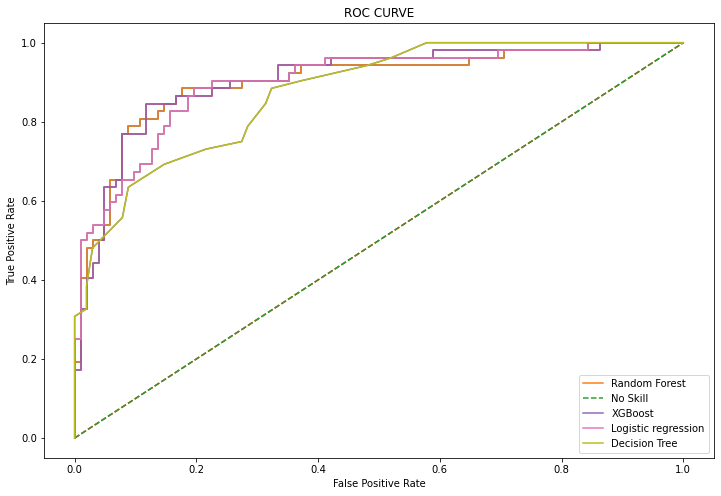

In [30]:
#ROC & AUC
from sklearn.metrics import roc_curve, roc_auc_score

prob3 =best_rf_model.predict_proba(X_test)[:,1]
fp3, tp3, e3 = roc_curve(y_test, prob3)
plt.figure(figsize = (12,8))
plt.plot([0,1], [0,1], "r--")
plt.plot(fp3, tp3)
plt.plot(fp3, tp3, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

prob2 = model2.predict_proba(X_test)[:,1]
fp2, tp2, e2 = roc_curve(y_test, prob2)
plt.plot(fp2, tp2)
plt.plot(fp2, tp2,label='XGBoost')

prob1 = model.predict_proba(X_test)[:,1]
fp1, tp1, e1 = roc_curve(y_test, prob1)
plt.plot(fp1, tp1)
plt.plot(fp1, tp1, label='Logistic regression')

prob4 =best_dt_model.predict_proba(X_test)[:,1]
fp4, tp4, e4 = roc_curve(y_test, prob4)
plt.plot(fp4, tp4)
plt.plot(fp4, tp4,label='Decision Tree')
plt.legend()
plt.title("ROC CURVE");

roc_auc = roc_auc_score(y_test, prob1)
print('Logistic regression ROC AUC %.3f' % roc_auc)
roc_auc = roc_auc_score(y_test, prob2)
print('XGBoost ROC AUC %.3f' % roc_auc)
roc_auc = roc_auc_score(y_test, prob3)
print('Random Forest ROC AUC %.3f' % roc_auc)
roc_auc = roc_auc_score(y_test, prob4)
print('Decision Tree ROC AUC %.3f' % roc_auc)

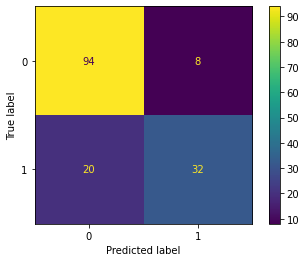

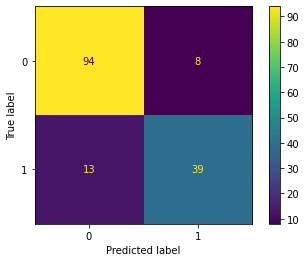

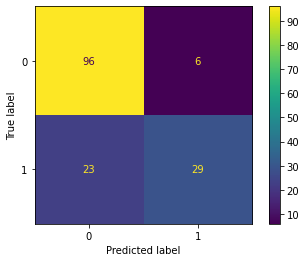

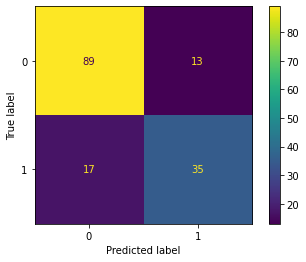

In [23]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1))
disp = disp.plot()
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))
disp = disp.plot()
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred))
disp = disp.plot()
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred))
disp = disp.plot()

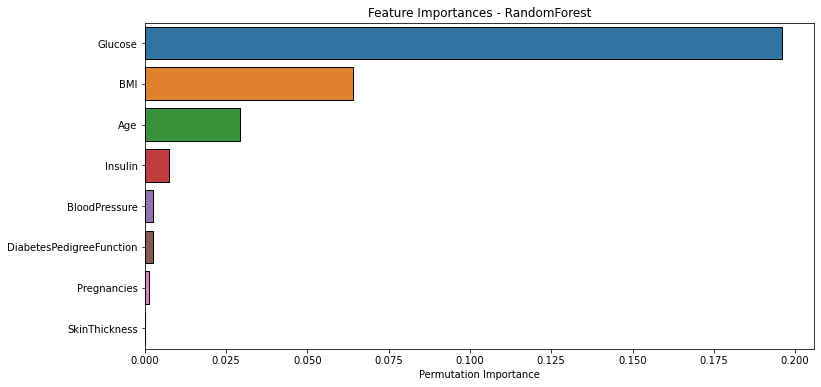

In [24]:
from sklearn.inspection import permutation_importance

importances = pd.Series(permutation_importance(best_rf_model, X_test, y_test).importances_mean, index=X_test.columns)
importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=importances.values, y=importances.index, ax=ax, edgecolor="black")

ax.set_xlabel("Permutation Importance")
ax.set_title("Feature Importances - RandomForest")

plt.show()

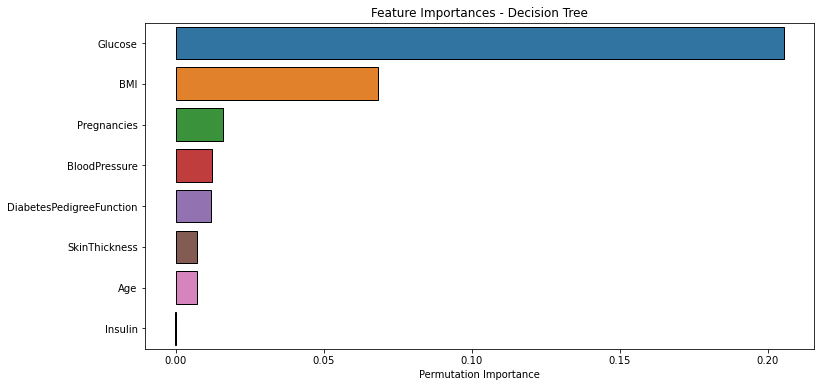

In [25]:
importances = pd.Series(permutation_importance(best_dt_model, X_test, y_test).importances_mean, index=X_test.columns)
importances.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=importances.values, y=importances.index, ax=ax, edgecolor="black")
ax.set_xlabel("Permutation Importance")
ax.set_title("Feature Importances - Decision Tree")
plt.show()

In [26]:
modeldt=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',min_samples_leaf=20)
modeldt.fit(X_train,y_train)
y_preddt=modeldt.predict(X_test)

accuracy=metrics.accuracy_score(y_test,y_preddt)
precision=metrics.precision_score(y_test,y_preddt)
recall=metrics.recall_score(y_test,y_preddt)
f1score=metrics.f1_score(y_test,y_preddt)
confusion_matrix(y_test,y_preddt)
print(accuracy,precision,recall,f1score)

0.8051948051948052 0.72 0.6923076923076923 0.7058823529411765


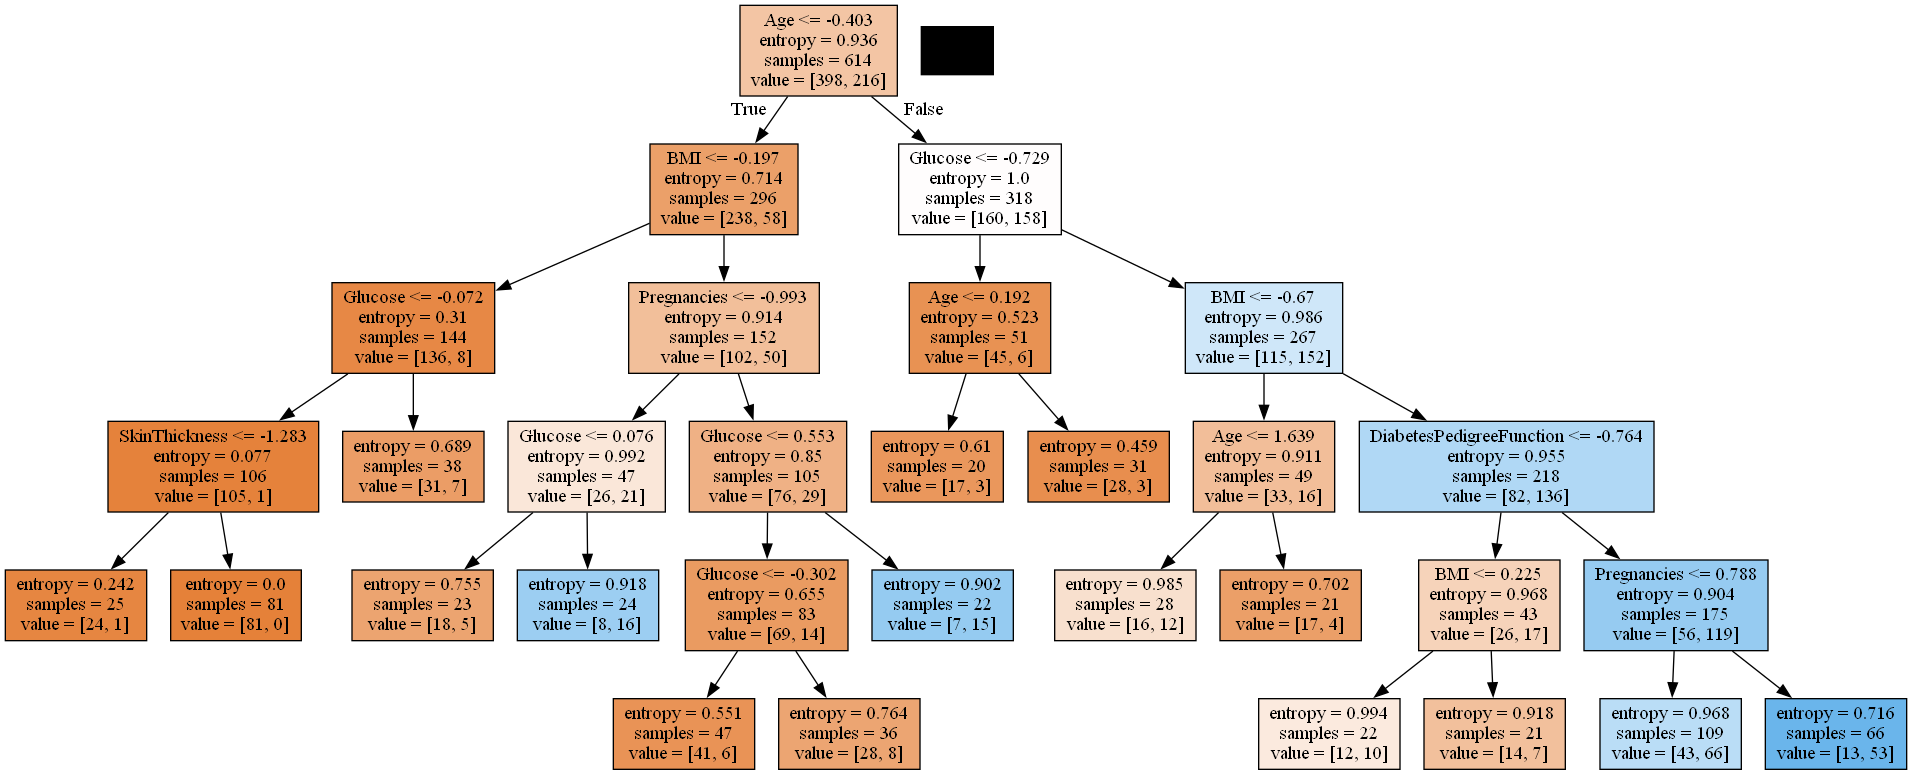

In [27]:
#visualize tree
from sklearn.tree import export_graphviz
import pydotplus
def tree_graph_to_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)

import os
os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\bin"

tree_str = export_graphviz(modeldt,feature_names=X_train.columns, filled=True, out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(tree_str)
graph.write_png("tree.png")

from IPython.display import Image
Image(graph.create_png())